In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.float_format = '{:10,.3f}'.format

In [3]:
pa_train = pd.read_pickle('processed_data/pa_train_elevation.pkl')

In [4]:
pa_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483637 entries, 0 to 1483636
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   lon                1483637 non-null  float64
 1   lat                1483637 non-null  float64
 2   year               1483637 non-null  int64  
 3   geoUncertaintyInM  1471141 non-null  float64
 4   areaInM2           1300365 non-null  float64
 5   region             1483637 non-null  object 
 6   country            1483637 non-null  object 
 7   speciesId          1483637 non-null  float64
 8   surveyId           1483637 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 101.9+ MB


In [5]:
from datamanagement.dataloader import DataLoader

# data = None
path_train = "data/GLC24_PA_metadata_train.csv"
data = DataLoader(path_train, None)
data._get_elevations()
data.train

:: Training data  with shape (1483637, 9) read in
:: No test data read in
:: Unique locations: 88783
:: Found elevations for each location
         lon        lat  year  geoUncertaintyInM   areaInM2         region  \
0      3.099     43.135  2021              5.000    100.000  MEDITERRANEAN   
1      3.099     43.135  2021              5.000    100.000  MEDITERRANEAN   
2      3.099     43.135  2021              5.000    100.000  MEDITERRANEAN   
3      3.099     43.135  2021              5.000    100.000  MEDITERRANEAN   
4      3.099     43.135  2021              5.000    100.000  MEDITERRANEAN   

  country  speciesId  surveyId  elevation  
0  France  6,874.000       212     26.000  
1  France    476.000       212     26.000  
2  France 11,157.000       212     26.000  
3  France  8,784.000       212     26.000  
4  France  4,530.000       212     26.000  


/home/startung/code/ml-geolife/datamanagement/csvloader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['elevation'] = data.apply(


,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId,elevation
0,3.099,43.135,2021,5.000,100.000,MEDITERRANEAN,France,"6,874.000",212,26.000
1,3.099,43.135,2021,5.000,100.000,MEDITERRANEAN,France,476.000,212,26.000
2,3.099,43.135,2021,5.000,100.000,MEDITERRANEAN,France,"11,157.000",212,26.000
3,3.099,43.135,2021,5.000,100.000,MEDITERRANEAN,France,"8,784.000",212,26.000
4,3.099,43.135,2021,5.000,100.000,MEDITERRANEAN,France,"4,530.000",212,26.000
...,...,...,...,...,...,...,...,...,...,...
1483632,9.914,56.828,2018,10.000,707.000,CONTINENTAL,Denmark,53.000,3919655,54.000
1483633,9.914,56.828,2018,10.000,707.000,CONTINENTAL,Denmark,"5,071.000",3919655,54.000
1483634,9.914,56.828,2018,10.000,707.000,CONTINENTAL,Denmark,"1,889.000",3919655,54.000
1483635,9.914,56.828,2018,10.000,707.000,CONTINENTAL,Denmark,"10,600.000",3919655,54.000


In [36]:
data.train.to_pickle('processed_data/pa_train_elevation.pkl')

In [7]:
with pd.option_context('mode.use_inf_as_na', True):
    pa_train.areaInM2 = pa_train.areaInM2.fillna(pa_train.areaInM2.mean())

/tmp/ipykernel_56832/2869189721.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [8]:
with pd.option_context('mode.use_inf_as_na', True):
    pa_train.elevation = pa_train.elevation.fillna(pa_train.elevation.mean())

/tmp/ipykernel_56832/3020589488.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [9]:
pa_train.groupby(['surveyId'], as_index=False).count().sort_values(by='speciesId', ascending=False)

,surveyId,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,elevation
2845,128364,837,837,837,837,837,837,837,837,837
81198,3584106,724,724,724,724,724,724,724,724,724
77560,3422936,461,461,461,461,461,461,461,461,461
45830,2021703,424,424,424,424,424,424,424,424,424
48423,2138980,421,421,421,421,421,421,421,421,421
...,...,...,...,...,...,...,...,...,...,...
39319,1731512,1,1,1,1,1,1,1,1,1
20394,895415,1,1,1,1,1,1,1,1,1
85081,3755216,1,1,1,1,1,1,1,1,1
2982,133801,1,1,1,1,1,1,1,1,1


In [10]:
pa_train.groupby(['surveyId'], as_index=False)['speciesId'].count().mean()

surveyId    1,963,014.290
speciesId          16.673
dtype: float64

In [11]:
pa_train.groupby(['surveyId'], as_index=False)['speciesId'].count()

,surveyId,speciesId
0,212,16
1,222,5
2,243,14
3,324,6
4,333,9
...,...,...
88982,3919553,11
88983,3919592,4
88984,3919620,12
88985,3919640,13


In [12]:
pa_train.groupby('surveyId').ngroups

88987

In [13]:
pa_train.groupby('surveyId').groups

{212: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 222: [16, 17, 18, 19, 20], 243: [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 324: [35, 36, 37, 38, 39, 40], 333: [41, 42, 43, 44, 45, 46, 47, 48, 49], 391: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], 410: [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], 489: [85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, ...], 590: [227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239], 607: [240, 241, 242, 243, 244, 245, 246, 247, 248, 

In [14]:
pa_train_grouped = pa_train.groupby('surveyId')[['lon', 'lat', 'year', 'geoUncertaintyInM', 'areaInM2', 'region', 'country', 'elevation']].first()
pa_train_grouped

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,elevation
surveyId,,,,,,,,
212,3.099,43.135,2021,5.000,100.000,MEDITERRANEAN,France,26.000
222,9.885,56.912,2017,10.000,79.000,CONTINENTAL,Denmark,54.000
243,8.256,55.637,2019,10.000,79.000,ATLANTIC,Denmark,-2.000
324,-0.403,43.506,2018,1.000,122.642,ATLANTIC,France,194.000
333,-0.517,45.806,2017,1.000,122.642,ATLANTIC,France,54.000
...,...,...,...,...,...,...,...,...
3919553,10.328,57.306,2018,10.000,79.000,CONTINENTAL,Denmark,26.000
3919592,15.004,55.090,2017,10.000,707.000,CONTINENTAL,Denmark,82.000
3919620,8.935,55.462,2018,10.000,79.000,ATLANTIC,Denmark,26.000


In [15]:
pa_train_grouped['speciesCount'] = pa_train.groupby('surveyId')[['speciesId']].count()

In [16]:
pa_train_grouped.head()

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,elevation,speciesCount
surveyId,,,,,,,,,
212,3.099,43.135,2021,5.000,100.000,MEDITERRANEAN,France,26.000,16
222,9.885,56.912,2017,10.000,79.000,CONTINENTAL,Denmark,54.000,5
243,8.256,55.637,2019,10.000,79.000,ATLANTIC,Denmark,-2.000,14
324,-0.403,43.506,2018,1.000,122.642,ATLANTIC,France,194.000,6
333,-0.517,45.806,2017,1.000,122.642,ATLANTIC,France,54.000,9


In [33]:
pa_train_grouped = pa_train_grouped.query('speciesCount < 180')

In [34]:
pa_train_grouped.drop(columns=['geoUncertaintyInM'], inplace=True)

KeyError: "['geoUncertaintyInM'] not found in axis"

In [18]:
categorical_cols = ['region', 'country']

In [19]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), list(categorical_cols)),
    remainder='passthrough')

transformed = transformer.fit_transform(pa_train_grouped)
transformer.get_feature_names_out().shape


(43,)

In [20]:
transformed_df = pd.DataFrame(
    transformed,
    columns=transformer.get_feature_names_out()
)

In [21]:
transformed_df.head()

,onehotencoder__region_ALPINE,onehotencoder__region_ATLANTIC,onehotencoder__region_BLACK SEA,onehotencoder__region_BOREAL,onehotencoder__region_CONTINENTAL,onehotencoder__region_MEDITERRANEAN,onehotencoder__region_PANNONIAN,onehotencoder__region_STEPPIC,onehotencoder__country_Andorra,onehotencoder__country_Austria,...,onehotencoder__country_Slovenia,onehotencoder__country_Spain,onehotencoder__country_Switzerland,onehotencoder__country_The former Yugoslav Republic of Macedonia,remainder__lon,remainder__lat,remainder__year,remainder__areaInM2,remainder__elevation,remainder__speciesCount
0,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,3.099,43.135,"2,021.000",100.000,26.000,16.000
1,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,9.885,56.912,"2,017.000",79.000,54.000,5.000
2,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,8.256,55.637,"2,019.000",79.000,-2.000,14.000
3,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,-0.403,43.506,"2,018.000",122.642,194.000,6.000
4,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,-0.517,45.806,"2,017.000",122.642,54.000,9.000


In [22]:
X = transformed_df.drop(columns=['remainder__speciesCount'])
y = transformed_df.remainder__speciesCount

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=113)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [25]:
linear_model = LinearRegression().fit(X_train, y_train)

In [26]:
y_pred = linear_model.predict(X_test)

In [27]:
mean_absolute_error(y_test, y_pred)

7.269359741228084

In [28]:
results = X_test
results['actual'] = y_test
results['predicted'] = y_pred

In [29]:
results[['actual', 'predicted']]

,actual,predicted
52278,10.000,14.775
4357,16.000,17.018
13258,16.000,11.457
36263,9.000,12.052
39061,14.000,31.958
...,...,...
47989,8.000,14.166
83218,4.000,17.337
11879,13.000,14.784
60155,2.000,11.048


<Axes: xlabel='actual', ylabel='predicted'>

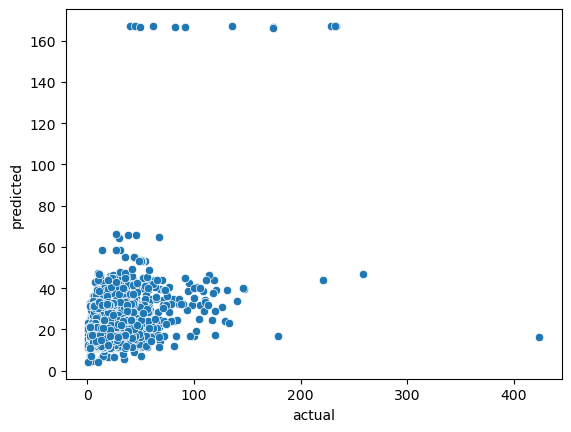

In [30]:
sns.scatterplot(x='actual', y='predicted', data=results)

In [32]:
results.query('actual > 180')

,onehotencoder__region_ALPINE,onehotencoder__region_ATLANTIC,onehotencoder__region_BLACK SEA,onehotencoder__region_BOREAL,onehotencoder__region_CONTINENTAL,onehotencoder__region_MEDITERRANEAN,onehotencoder__region_PANNONIAN,onehotencoder__region_STEPPIC,onehotencoder__country_Andorra,onehotencoder__country_Austria,...,onehotencoder__country_Spain,onehotencoder__country_Switzerland,onehotencoder__country_The former Yugoslav Republic of Macedonia,remainder__lon,remainder__lat,remainder__year,remainder__areaInM2,remainder__elevation,actual,predicted
7530,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,26.105,57.701,"2,018.000",25.000,82.000,229.000,167.097
45628,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,26.105,57.702,"2,018.000",10.000,82.000,233.000,167.114
45830,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,3.940,51.024,"2,020.000",9.000,-2.000,424.000,16.510
40460,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,26.109,57.700,"2,018.000",25.000,82.000,232.000,167.097
68271,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,15.965,45.903,"2,017.000",400.000,362.000,259.000,47.078
26578,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,12.450,47.021,"2,018.000",0.100,"1,874.000",221.000,44.087
